In [1]:
import numpy as np
import cv2
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Input
from tensorflow.keras.layers import Conv2D,MaxPooling2D,GlobalMaxPooling2D
from tensorflow.keras.preprocessing import image

%matplotlib inline

In [3]:
data_gen=ImageDataGenerator(rescale=1/255,validation_split=0.20)

In [4]:
data_train1=data_gen.flow_from_directory(r"../input/fashiondatacolor-images/FashionData/Train_Directory",
                                         batch_size=32,class_mode='categorical',
                                        target_size=(256,256))

Found 165107 images belonging to 12 classes.


from sklearn.model_selection import train_test_split
data_train,data_test=train_test_split(data_train1,test_size=0.2)

In [5]:
from tensorflow.keras.applications.vgg16 import VGG16

In [6]:
model1=VGG16(weights='imagenet',include_top=False,input_shape=(256,256,3))
for layer in model1.layers:
    layer.trainable=False
flatten=tf.keras.layers.Flatten()
pre=tf.keras.layers.Dense(12,activation='softmax')
model=tf.keras.models.Sequential(model1)
model.add(flatten)
model.add(pre)

2022-11-07 11:26:56.834646: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 11:26:56.927477: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 11:26:56.928383: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-07 11:26:56.929688: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 0s 0us/step


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 12)                393228    
Total params: 15,107,916
Trainable params: 393,228
Non-trainable params: 14,714,688
_________________________________________________________________


In [8]:
model.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'])

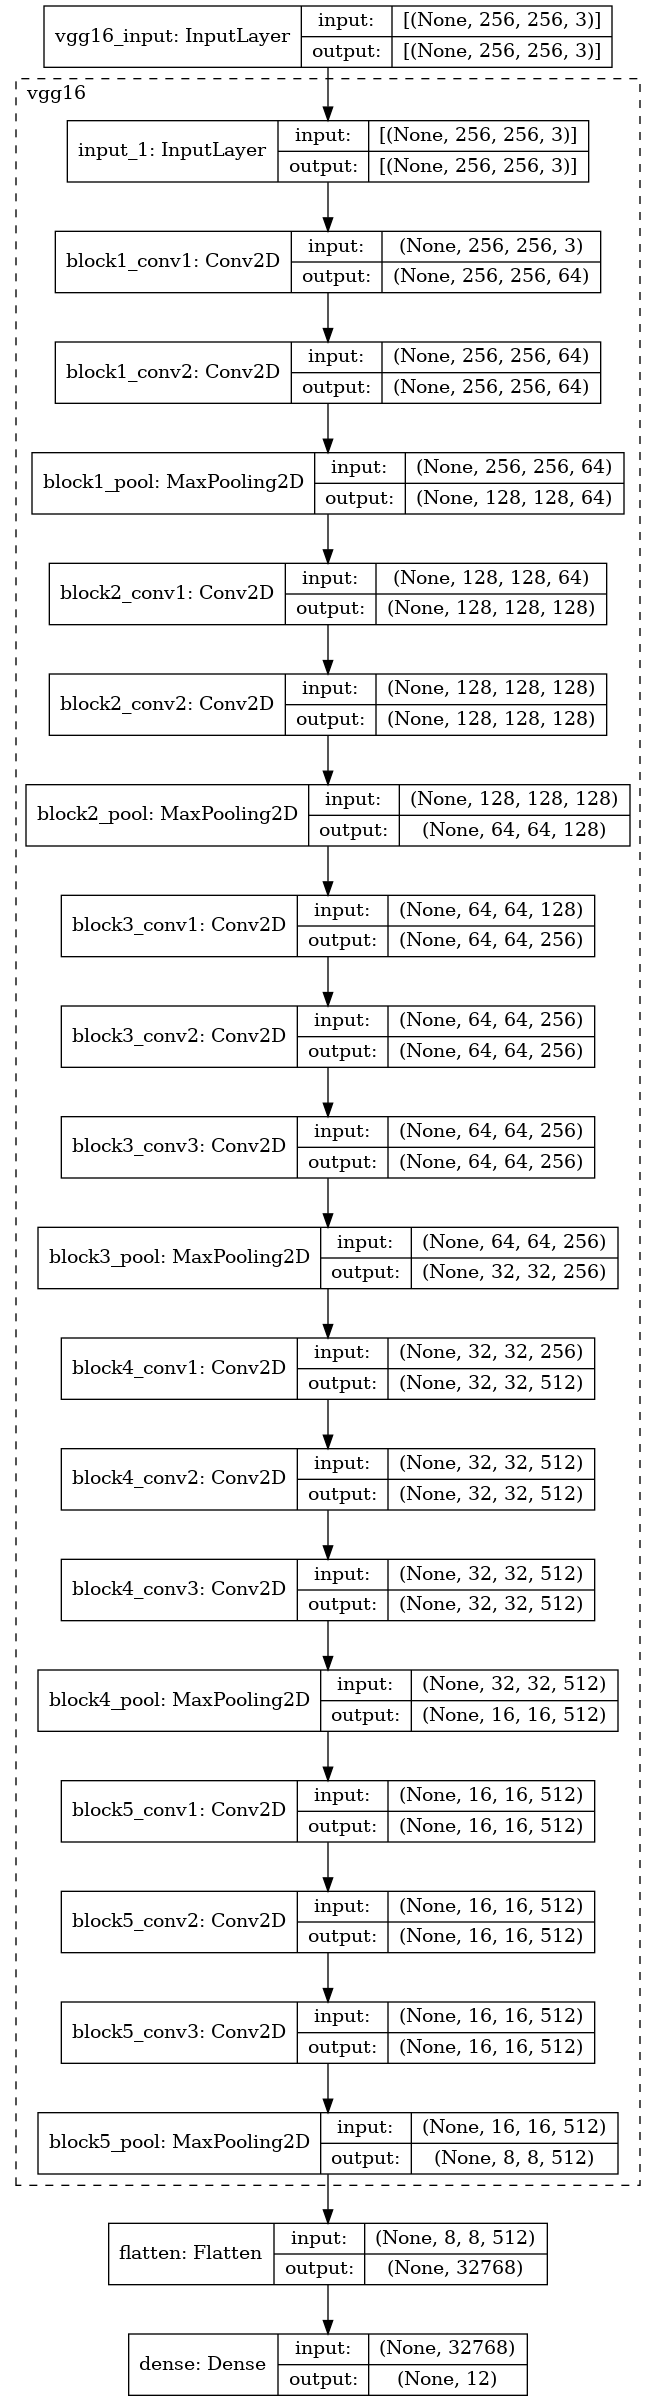

In [9]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=True)

In [10]:
history=model.fit(data_train1,verbose=1,epochs=7,batch_size=64)

2022-11-07 11:27:01.934318: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/7


2022-11-07 11:27:03.729627: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


5160/5160 [==============================] - 2046s 395ms/step - loss: 0.7341 - accuracy: 0.7689
Epoch 2/7
5160/5160 [==============================] - 1253s 243ms/step - loss: 0.3434 - accuracy: 0.8931
Epoch 3/7
5160/5160 [==============================] - 1175s 228ms/step - loss: 0.2508 - accuracy: 0.9231
Epoch 4/7
5160/5160 [==============================] - 1238s 240ms/step - loss: 0.2080 - accuracy: 0.9396
Epoch 5/7
5160/5160 [==============================] - 1239s 240ms/step - loss: 0.1741 - accuracy: 0.9499
Epoch 6/7
5160/5160 [==============================] - 1170s 227ms/step - loss: 0.1558 - accuracy: 0.9564
Epoch 7/7
5160/5160 [==============================] - 1206s 234ms/step - loss: 0.1331 - accuracy: 0.9630


In [11]:
data_test=data_gen.flow_from_directory(r"../input/fashiondatacolor-images/FashionData/Validation_Directory",
                                         batch_size=32,class_mode='categorical',
                                        target_size=(256,256))

Found 3393 images belonging to 12 classes.


In [12]:
result=model.evaluate(data_test,batch_size=32)

107/107 [==============================] - 50s 461ms/step - loss: 0.0666 - accuracy: 0.9817


In [13]:
history.history

{'loss': [0.734148383140564,
  0.343371719121933,
  0.250813752412796,
  0.20801113545894623,
  0.17411692440509796,
  0.1557868868112564,
  0.13310493528842926],
 'accuracy': [0.768883228302002,
  0.8930814266204834,
  0.9231225848197937,
  0.9396270513534546,
  0.9499052166938782,
  0.9563919305801392,
  0.9629815816879272]}

In [14]:
import pickle

In [15]:
saved_model = pickle.dumps(model)

TypeError: can't pickle weakref objects

In [16]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
